In [56]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../')
from data_curation import Normalization
from itertools import compress
from pyeyemo import pupillometry2_0_commons as pc
import commons as cm

In [57]:
data_black=pd.read_csv('black_back_lum.csv')
data_gray=pd.read_csv('gray_back_lum.csv')


In [58]:
data_black['back']='black'
data_gray['back']='gray'

data=pd.concat([data_black,data_gray])
data=data.set_index('Unnamed: 0')
data

,Unnamed: 0.1,Baseline,Latency_a,Latency_b,T2MaxVel,T2MaxCon,T2Rec75pc,PeakCon,ConAmplitude,VelConMax,...,ConTime,VelRedAve,VelRedMax,AccRedMax,assets,mean_lum_mask,std_lum_mask,mean_lum,std_lum,back
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
36,0,0.009363,0.291667,0.266667,0.375000,0.983333,0.00,-0.948374,0.957737,3.027063,...,0.691667,0.146525,1.414416,194.389243,Asset0042,0.335771,0.083976,0.126584,0.126584,black
9,1,0.013289,0.291667,0.266667,3.041667,0.858333,0.00,-0.773300,0.786589,2.780759,...,0.566667,0.185198,4.286116,509.040045,Asset0010,0.283802,0.103267,0.108348,0.108348,black
33,2,0.003058,0.291667,0.275000,3.041667,0.866667,0.00,-0.765943,0.769001,2.700989,...,0.575000,0.201488,4.178692,514.989549,Asset0039,0.356978,0.083390,0.128987,0.128987,black
6,3,-0.003289,0.258333,0.275000,0.375000,0.958333,0.00,-0.926228,0.922939,2.822328,...,0.700000,0.183631,4.081117,483.454609,Asset0007,0.403765,0.108018,0.152787,0.152787,black
40,4,0.001440,0.266667,0.258333,0.383333,0.950000,0.00,-1.145500,1.146940,3.321663,...,0.683333,0.199441,5.793752,717.590318,Asset0046,0.369396,0.092908,0.172752,0.172752,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,42,0.001378,0.566667,0.066667,1.966667,2.041667,0.00,-0.226763,0.228141,0.460491,...,1.475000,0.149117,0.352164,9.640033,Control05,0.330806,0.161370,0.056559,0.056559,gray
12,43,0.004976,0.425000,0.841667,0.891667,0.975000,0.00,-0.273064,0.278039,0.735905,...,0.550000,0.095044,0.430662,12.161685,Asset0014,0.336928,0.103744,0.148352,0.148352,gray
29,44,0.007119,0.475000,0.333333,0.466667,1.108333,0.00,-0.187901,0.195019,0.565420,...,0.633333,0.123305,0.531556,11.170998,Asset0034,0.366863,0.116613,0.157907,0.157907,gray


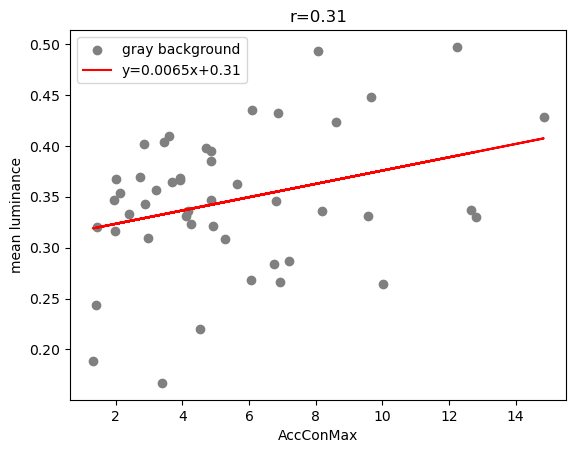

In [137]:
var='AccConMax'
df=data_gray
x=df[var]
y=df['mean_lum_mask']
pearson,slope,intercet=cm.linear_correlation(x,y,'gray')
plt.legend(['gray background',f'y={slope:.2}x+{intercet:.2}'])
plt.ylabel('mean luminance')
plt.xlabel(var)
plt.title(f'r={pearson:.2}')
plt.savefig(f'gray_back_{var}', dpi=300)

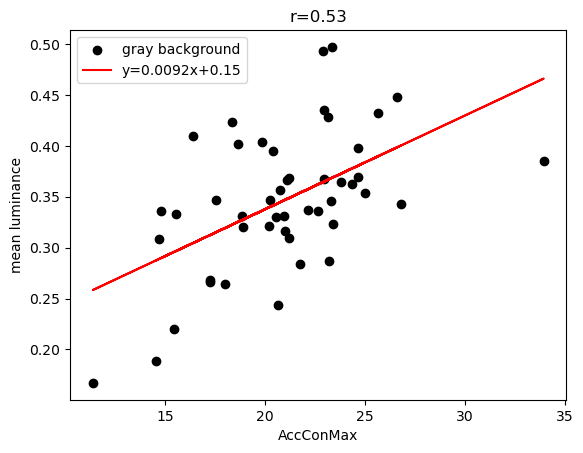

In [138]:
var='AccConMax'
df=data_black
x=df[var]
y=df['mean_lum_mask']
pearson,slope,intercet=cm.linear_correlation(x,y,'black')
plt.legend(['gray background',f'y={slope:.2}x+{intercet:.2}'])
plt.ylabel('mean luminance')
plt.xlabel(var)
plt.title(f'r={pearson:.2}')
plt.savefig(f'gray_back_{var}', dpi=300)

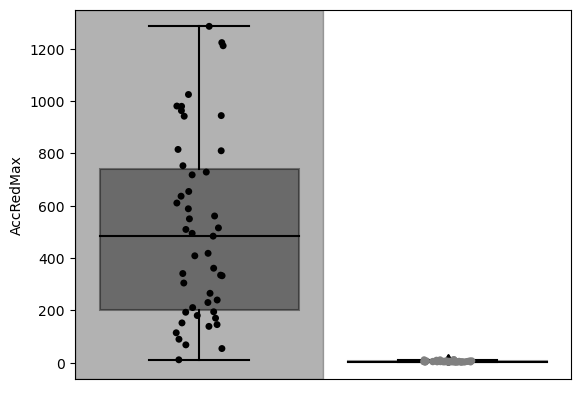

In [110]:
from  scipy import stats 
pair='AccRedMax'
fig,ax=plt.subplots(1)
toplot=sns.boxplot(data=data,x='back',y=pair,boxprops={'alpha': 0.4},palette={'black': 'black', 'gray': 'white'})
sns.stripplot(data=data,x='back',y=pair,hue='back',legend=None,palette={'black': 'black', 'gray': 'gray'})
ax.axvspan(-0.5,0.5, color='k', alpha=.3)
plt.xticks([])
ax.set_xlabel('')

pman_stats,pman = stats.mannwhitneyu(data.query("back=='black'")[pair], data.query("back=='gray'")[pair], method="exact")
# ax.set_title(f' p value for mannwithney= {pman:.7f}')
plt.savefig(f'{pair}_back_comp', dpi=300)


In [144]:
var='VelConAve'
data_black[[var,'mean_lum','std_lum','mean_lum_mask','std_lum_mask','assets']].sort_values([var,'mean_lum'],ascending=False).mean()


C:\Users\Bolo\AppData\Local\Temp\ipykernel_21160\422798375.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_black[[var,'mean_lum','std_lum','mean_lum_mask','std_lum_mask','assets']].sort_values([var,'mean_lum'],ascending=False).mean()


VelConAve        1.292997
mean_lum         0.132231
std_lum          0.132231
mean_lum_mask    0.346021
std_lum_mask     0.116486
dtype: float64

In [19]:
data.columns

Index(['Unnamed: 0.1', 'Baseline', 'Latency_a', 'Latency_b', 'T2MaxVel',
       'T2MaxCon', 'T2Rec75pc', 'PeakCon', 'ConAmplitude', 'VelConMax',
       'VelConAve', 'AccConMax', 'ConTime', 'VelRedAve', 'VelRedMax',
       'AccRedMax', 'assets', 'mean_lum_mask', 'std_lum_mask', 'mean_lum',
       'std_lum', 'back'],
      dtype='object')